In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
df = pd.read_csv("C:/Users/sriva/Downloads/Advertising.csv")
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
df.shape

(200, 5)

In [7]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

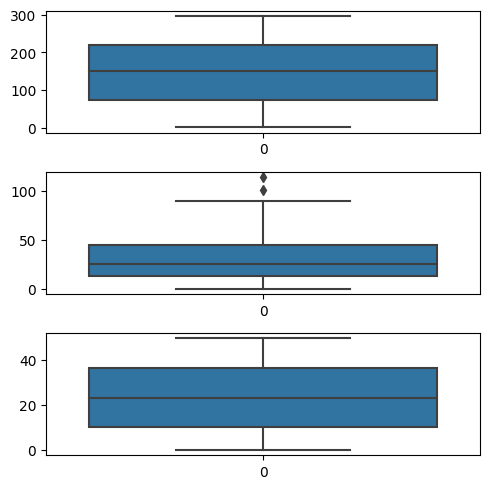

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [15]:
data = df.copy()

In [16]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

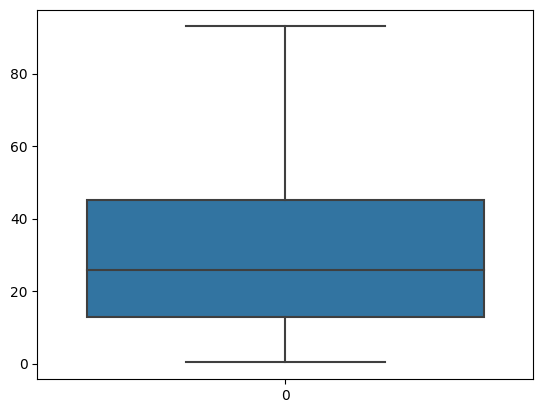

In [17]:
sns.boxplot(data['Newspaper'])

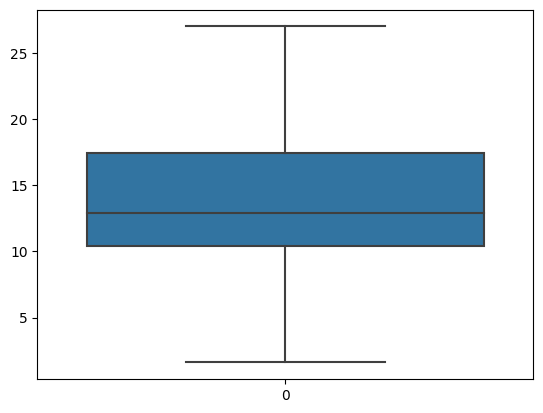

In [18]:
sns.boxplot(data['Sales']);

<Axes: xlabel='Newspaper', ylabel='Density'>

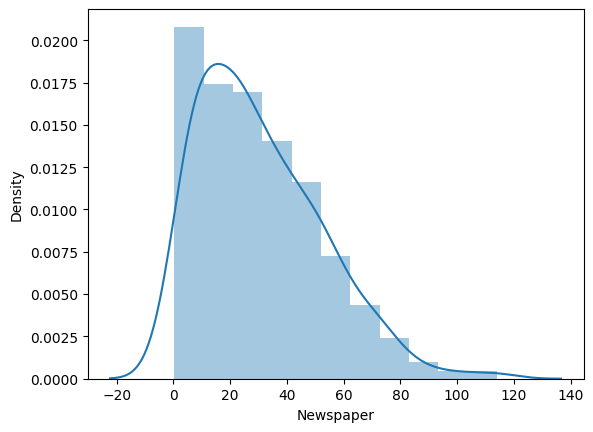

In [19]:
sns.distplot(df['Newspaper'])

<Axes: xlabel='Sales', ylabel='Density'>

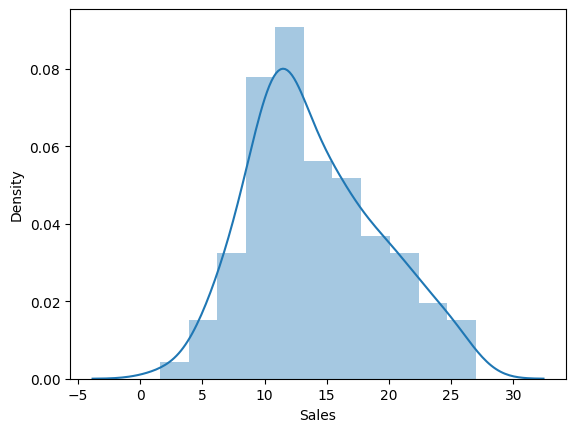

In [20]:
sns.distplot(df['Sales'])

<Axes: xlabel='TV', ylabel='Density'>

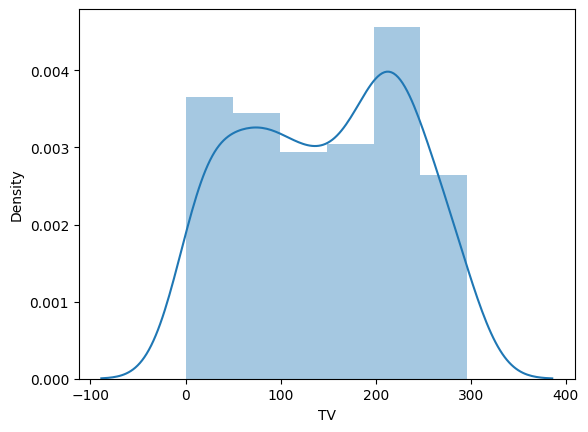

In [21]:
sns.distplot(df['TV'])

<Axes: xlabel='Radio', ylabel='Density'>

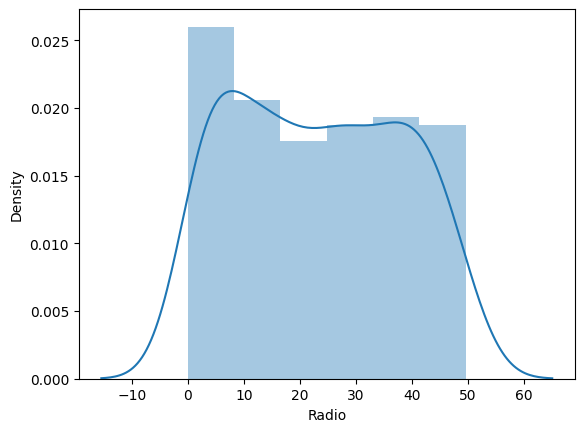

In [22]:
sns.distplot(df['Radio'])

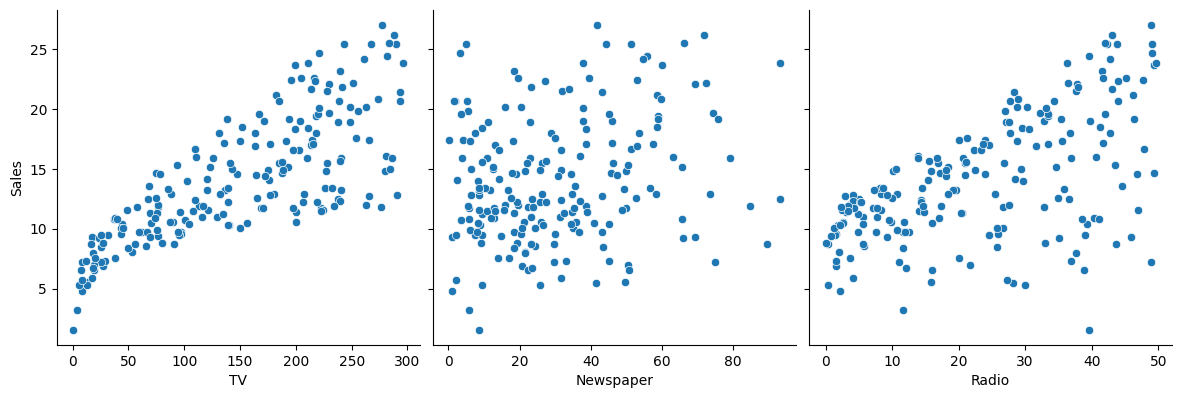

In [23]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

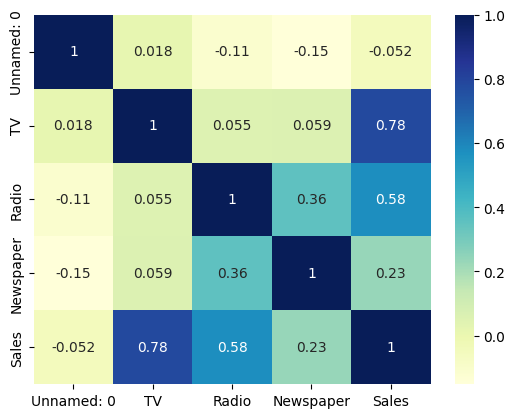

In [24]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [31]:
import plotly.express as px
data = df[["Newspaper", "TV", "Radio"]]
figure = px.sunburst(df, path=["Newspaper", "TV" ,"Radio"], 
                     values="Sales", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Sales prediction")
figure.show()

In [33]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
print(important_features)


['TV', 'Radio', 'Sales']


In [48]:
df.sample(8)

,Unnamed: 0,TV,Radio,Newspaper,Sales
34,35,95.7,1.4,7.4,9.5
86,87,76.3,27.5,16.0,12.0
130,131,0.7,39.6,8.7,1.6
133,134,219.8,33.5,45.1,19.6
126,127,7.8,38.9,50.6,6.6
129,130,59.6,12.0,43.1,9.7
52,53,216.4,41.7,39.6,22.6
82,83,75.3,20.3,32.5,11.3


In [49]:
df.isnull

<bound method DataFrame.isnull of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [50]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<Axes: xlabel='TV', ylabel='Count'>

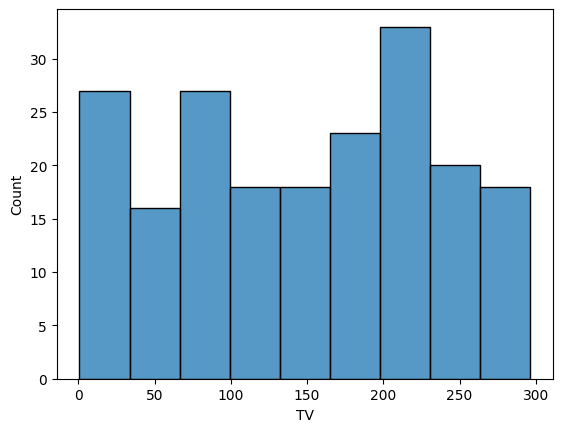

In [54]:
sns.histplot(df['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

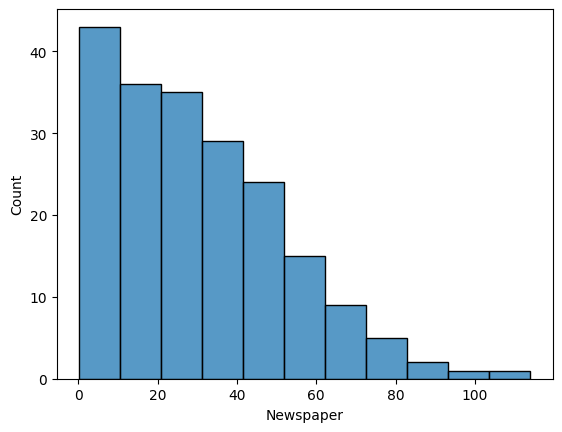

In [55]:
sns.histplot(df['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

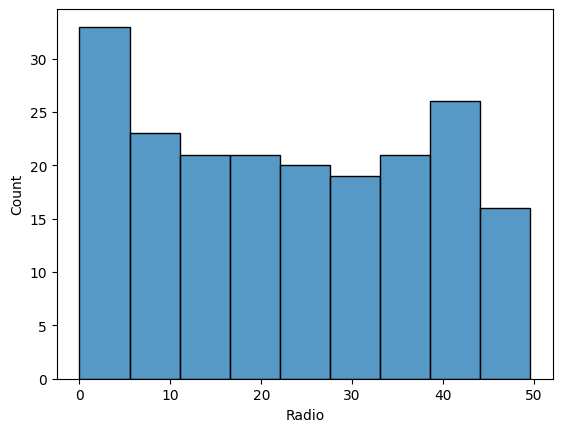

In [56]:
sns.histplot(df['Radio'])

<Axes: xlabel='Sales', ylabel='Count'>

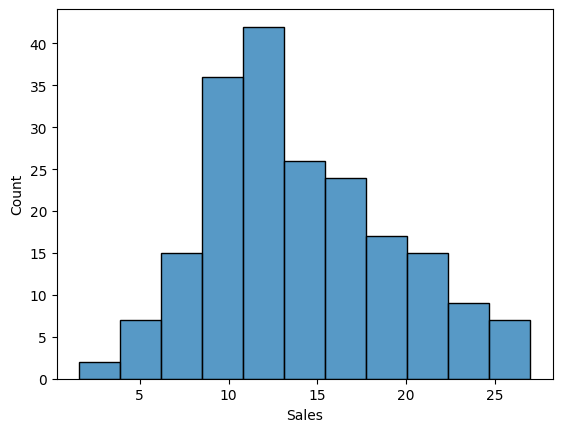

In [57]:
sns.histplot(df['Sales'])

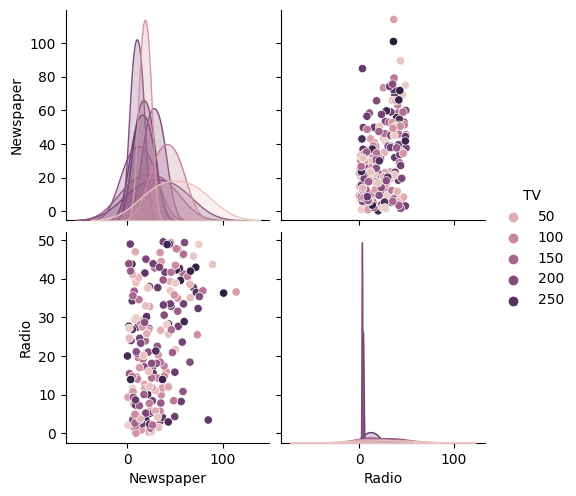

In [60]:
sns.pairplot(data,hue='TV')

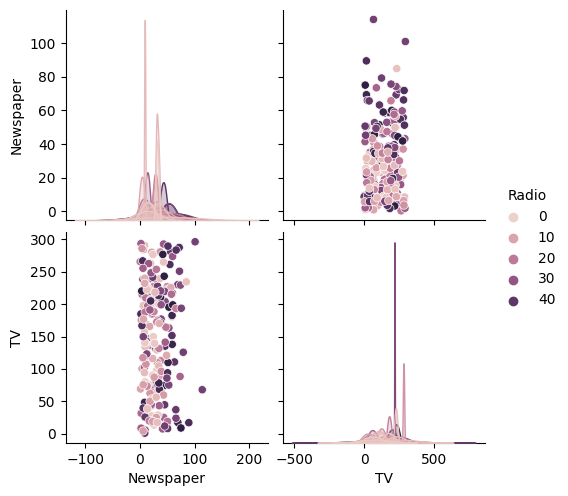

In [61]:
sns.pairplot(data,hue='Radio')

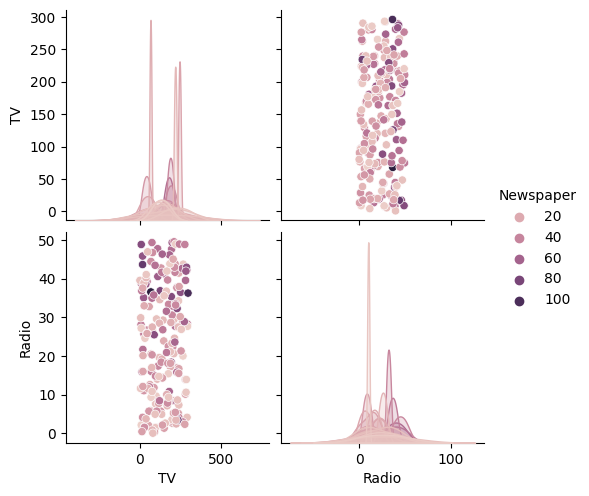

In [62]:
sns.pairplot(data,hue='Newspaper')

In [63]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [69]:
x= data.iloc[:,0:-1]
x

,Newspaper,TV
0,69.2,230.1
1,45.1,44.5
2,69.3,17.2
3,58.5,151.5
4,58.4,180.8
...,...,...
195,13.8,38.2
196,8.1,94.2
197,6.4,177.0
198,66.2,283.6


In [70]:
y= data.iloc[:,-1]
y

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
logmodel = LogisticRegression()


In [82]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

